# PCA Step by step implementation

In [12]:
import numpy as np
import pandas as pd

np.random.seed(23)

mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20)

df = pd.DataFrame(class1_sample,columns=['feature1','feature2','feature3'])
df['target'] = 1

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20)

df1 = pd.DataFrame(class2_sample,columns=['feature1','feature2','feature3'])

df1['target'] = 0

df = pd.concat([df, df1], ignore_index=True)

df = df.sample(40)

In [13]:
df.head(10)

,feature1,feature2,feature3,target
2,-0.367548,-1.137460,-1.322148,1
34,0.177061,-0.598109,1.226512,0
14,0.420623,0.411620,-0.071324,1
11,1.968435,-0.547788,-0.679418,1
12,-2.506230,0.146960,0.606195,1
29,1.425140,1.441152,0.182561,0
31,2.224431,0.230401,1.192120,0
4,0.322272,0.060343,-1.043450,1
32,-0.723253,1.461259,-0.085367,0
33,2.823378,-0.332863,2.637391,0


# Using plotly to plot 3D graph

In [32]:
import plotly.express as px

fig = px.scatter_3d(df, x='feature1', y='feature2', z='feature3',
              color='target')
fig.show()



#PCA Step 1

In [14]:
# Step 1 - Apply standard scaling / Mean Centered
from sklearn.preprocessing import StandardScaler

features = ['feature1', 'feature2', 'feature3']
ss = StandardScaler()
ss.fit_transform(df[features])


array([[-7.00808909e-01, -1.52558622e+00, -1.74915630e+00],
       [-2.24480873e-01, -1.01075678e+00,  4.91251361e-01],
       [-1.14564810e-02, -4.69345322e-02, -6.49615529e-01],
       [ 1.34229583e+00, -9.62723488e-01, -1.18416295e+00],
       [-2.57134993e+00, -2.99561164e-01, -5.40397642e-02],
       [ 8.67117739e-01,  9.35790500e-01, -4.26437402e-01],
       [ 1.56619581e+00, -2.19914261e-01,  4.61018902e-01],
       [-9.74766674e-02, -3.82240727e-01, -1.50416629e+00],
       [-1.01191670e+00,  9.54984015e-01, -6.61959948e-01],
       [ 2.09004923e+00, -7.57570343e-01,  1.73148981e+00],
       [-1.59495163e+00,  1.96573636e-01,  5.94105028e-01],
       [-6.69382831e-01, -1.99801138e+00, -4.26836402e-02],
       [ 2.04020404e-01, -4.15200709e-01, -1.27048700e+00],
       [-1.26266138e+00, -1.81870336e-02,  4.05425080e-01],
       [-4.27309418e-02,  8.23531488e-01, -6.77630557e-01],
       [ 1.08727791e+00,  3.55728104e+00, -6.57738712e-01],
       [-1.68465650e-01, -1.34904467e+00

#Step 2

In [15]:
# Step 2 - Find Covariance Matrix
cov_mat = np.cov(ss.fit_transform(df[features]).T)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[1.02564103 0.20478114 0.080118  ]
 [0.20478114 1.02564103 0.19838882]
 [0.080118   0.19838882 1.02564103]]


#Step3

In [16]:
# Step 3 - Finding Eigen Vectors and Eigen Values
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigen vectors \n%s' %eig_vecs)
print('\nEigen values \n%s' %eig_vals)


Eigen vectors 
[[-0.53875915 -0.69363291  0.47813384]
 [-0.65608325 -0.01057596 -0.75461442]
 [-0.52848211  0.72025103  0.44938304]]

Eigen values 
[1.3536065  0.94557084 0.77774573]


#Step 4

Populating the interactive namespace from numpy and matplotlib


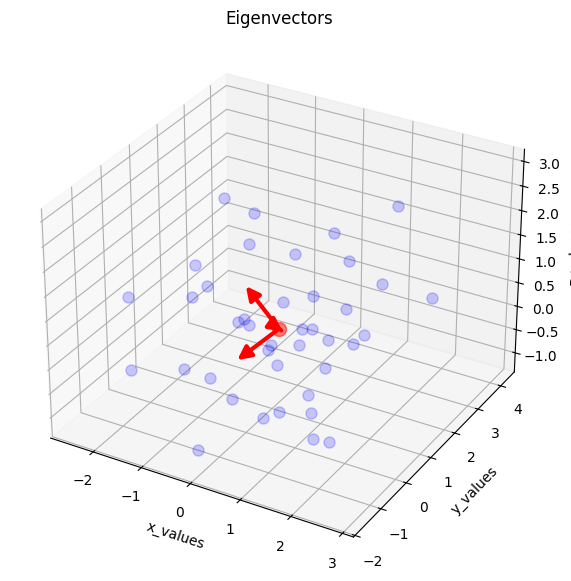

In [17]:
%pylab inline

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch


class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def do_3d_projection(self, renderer=None):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))

        return np.min(zs) # Return the minimum z-coordinate for correct depth sorting

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(df['feature1'], df['feature2'], df['feature3'], 'o', markersize=8, color='blue', alpha=0.2)
ax.plot([df['feature1'].mean()], [df['feature2'].mean()], [df['feature3'].mean()], 'o', markersize=10, color='red', alpha=0.5)
for v in eig_vecs.T:
    # Scale the eigenvectors for better visualization, starting from the mean
    a = Arrow3D([df['feature1'].mean(), df['feature1'].mean() + v[0]],
                [df['feature2'].mean(), df['feature2'].mean() + v[1]],
                [df['feature3'].mean(), df['feature3'].mean() + v[2]],
                mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors')
plt.savefig('eigenvectors.png')
plt.show()

#Step 5

In [20]:
# Selecting Eigen Vectors
pc = eig_vecs[0:2]
pc

array([[-0.53875915, -0.69363291,  0.47813384],
       [-0.65608325, -0.01057596, -0.75461442]])

#Step 6

In [26]:
#Transforming Data
transformed_df = np.dot(df.iloc[:,0:3], pc.T)

new_df = pd.DataFrame(transformed_df, columns=['PC1', 'PC2'])
new_df['target'] = df['target'].values
new_df.head(10)

,PC1,PC2,target
0,0.354836,1.250883,1
1,0.905912,-1.035385,0
2,-0.546230,-0.226495,1
3,-1.005401,-0.772965,1
4,1.538160,1.185298,1
5,-1.680149,-1.088015,0
6,-0.788253,-2.361439,0
7,-0.714391,0.575327,1
8,-0.664735,0.523479,0
9,-0.029210,-3.839064,0


In [31]:
#plotting a graph
fig = px.scatter(new_df, x='PC1', y='PC2', color='target')
fig.show()